In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.graphics.gofplots as smgf
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

plt.rcParams.update({'font.size': 14})

## Laborator: exerciţii şi probleme

__Q1.__ Pentru datele de mai jos (cazul 1 de la curs):

a) reconstruiți graficul de la curs, figurînd mediile pentru ambele grupuri, și reconstruind dreptele de regresie (grupurile și dreptele colorate diferit, în funcție de grup);

b) observați diferența între medii precum și diferența dintre intercept-uri;

c) construiți valorile $y$ pentru a obține, succesiv, graficele din cazurile 2 - 5 de la curs, cu aceleași remarci de la punctul b).

In [2]:
def draw_plot(x1, y1, x2, y2, lm1, lm2):
    
    colour_b = 'teal'
    colour_r = 'orange'
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    ax.scatter(x1, y1, c=colour_b)
    ax.plot(np.sort(x1), lm1.params[0] + lm1.params[1] * np.sort(x1), 
            colour_b, lw=2)
    ax.axhline(y=y1.mean(), c='k')

    ax.scatter(x2, y2, c=colour_r)
    ax.plot(np.sort(x2), lm2.params[0] + lm2.params[1] * np.sort(x2), 
            colour_r, lw=2)
    ax.axhline(y=y2.mean(), c='k')
    
    ax.grid()
    plt.show()

In [3]:
def build_case(x, t, beta0, beta1_1, beta1_2):
    
    x1 = x[:n]
    x2 = x[n:]
    t1 = t[:n]
    t2 = t[n:]

    xext_1 = sm.add_constant(x1)
    xext_2 = sm.add_constant(x2)

    y1 = beta0 + t1 + x1 * beta1_1 + np.random.randn(n)*sigma
    y2 = beta0 + t2 + x2 * beta1_2 + np.random.randn(n)*sigma
    lm1 = sm.OLS(y1, xext_1).fit()
    lm2 = sm.OLS(y2, xext_2).fit()

    draw_plot(x1, y1, x2, y2, lm1, lm2)
    
    x1_mean = np.mean(x1)
    x2_mean = np.mean(x2)
    
    print(f'R Q1. a) Mediile pentru ambele grupuri')
    print(f'Group 1 X mean: {x1_mean}')
    print(f'Group 2 X mean: {x2_mean}')
    print()
    
    print(f'R Q1. b) Diferenta intre medii si intercept-uri.')
    y1_mean = np.mean(y1)
    y2_mean = np.mean(y2)

    print(f'Group 1 Y mean: {y1_mean}')
    print(f'Group 2 Y mean: {y2_mean}')

    print(f'Group 1 intercept: {lm1.params[0]}')
    print(f'Group 2 intercept: {lm2.params[0]}')
    print()

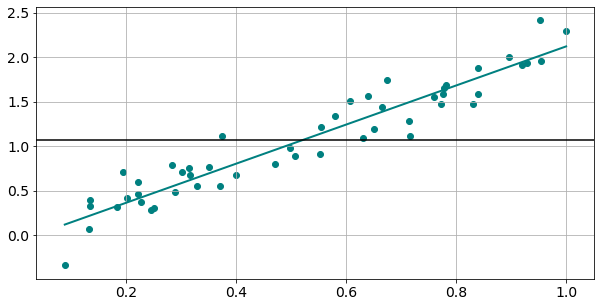

In [4]:
n, sigma = 50, 0.2
beta0, beta1 = 0, 2
x = np.r_[np.random.rand(n), + np.random.rand(n)]
t = np.array([0]*n + [1]*n)
y = beta0 + t + x * beta1 + np.random.randn(2*n)*sigma
lm1 = sm.OLS(y[:n], sm.add_constant(x[:n])).fit()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x[:n], y[:n], c='teal')
ax.plot(np.sort(x[:n]), lm1.params[0] + lm1.params[1] * np.sort(x[:n]), 
        'teal', lw=2)
ax.axhline(y=y[:n].mean(), c='k')
ax.grid()
plt.show()

Cazul 1: variabila X nu este corelata.


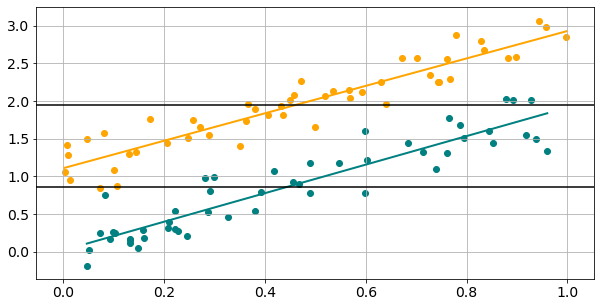

R Q1. a) Mediile pentru ambele grupuri
Group 1 X mean: 0.44223373562350593
Group 2 X mean: 0.46117356496485146

R Q1. b) Diferenta intre medii si intercept-uri.
Group 1 Y mean: 0.8567106084188009
Group 2 Y mean: 1.9480671522569666
Group 1 intercept: 0.019433955080750683
Group 2 intercept: 1.1085736225264333



In [5]:
print(f'Cazul 1: variabila X nu este corelata.') 
n, sigma = 50, 0.2
beta0, beta1 = 0, 2
x = np.r_[np.random.rand(n), + np.random.rand(n)]
t = np.array([0]*n + [1]*n)

build_case(x, t, beta0, beta1, beta1)

R Q1. c) Cazul 2: variabila X este puternic legata de grup (variabila T).


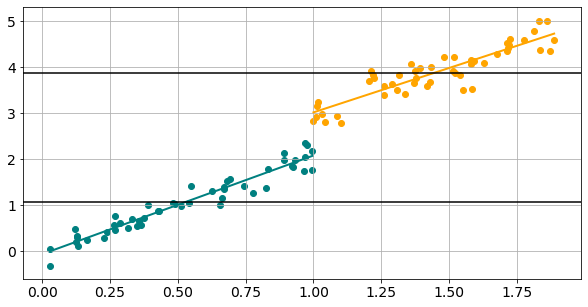

R Q1. a) Mediile pentru ambele grupuri
Group 1 X mean: 0.5316498457630305
Group 2 X mean: 1.4468125334118036

R Q1. b) Diferenta intre medii si intercept-uri.
Group 1 Y mean: 1.075921318927004
Group 2 Y mean: 3.8834813412492997
Group 1 intercept: -0.06550660862048098
Group 2 intercept: 1.0873841242512459



In [6]:
print(f'R Q1. c) Cazul 2: variabila X este puternic legata de grup (variabila T).')

n, sigma = 50, 0.2
beta0, beta1 = 0, 2
x = np.r_[np.random.rand(n), + np.random.rand(n) + 1]
t = np.array([0]*n + [1]*n)

build_case(x, t, beta0, beta1, beta1)

R Q1. c) Cazul 3: Exista suprapunere intre grupuri.


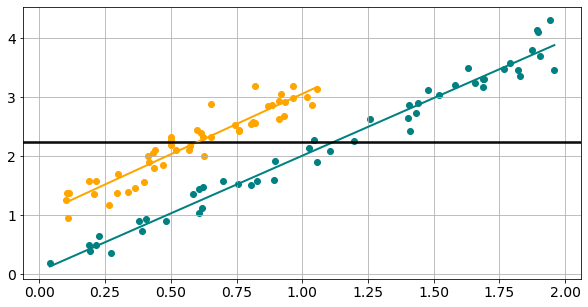

R Q1. a) Mediile pentru ambele grupuri
Group 1 X mean: 1.1219200440310342
Group 2 X mean: 0.5892556570410451

R Q1. b) Diferenta intre medii si intercept-uri.
Group 1 Y mean: 2.2482385849483792
Group 2 Y mean: 2.217738088703493
Group 1 intercept: 0.05515308765668222
Group 2 intercept: 1.0107368258482459



In [7]:
print(f'R Q1. c) Cazul 3: Exista suprapunere intre grupuri.')

n, sigma = 50, 0.2
beta0, beta1 = 0, 2
x = np.r_[np.random.rand(n) * 2, + (np.random.rand(n) + 0.1)]
t = np.array([0]*n + [1]*n)

build_case(x, t, beta0, beta1, beta1)

R Q1. c) Cazul 4: Aproape nu exista efect marginal al grupului.


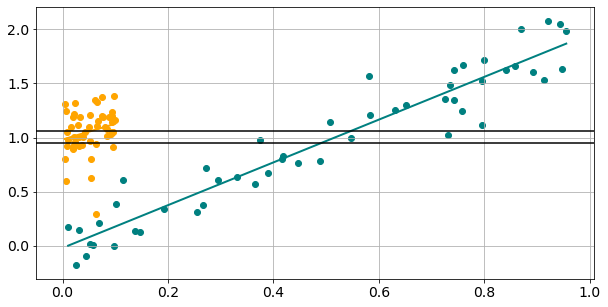

R Q1. a) Mediile pentru ambele grupuri
Group 1 X mean: 0.49246411884381525
Group 2 X mean: 0.050946870898248564

R Q1. b) Diferenta intre medii si intercept-uri.
Group 1 Y mean: 0.9530640463958544
Group 2 Y mean: 1.0560362482547
Group 1 intercept: -0.02078099893894991
Group 2 intercept: 0.9818356081362978



In [8]:
print(f'R Q1. c) Cazul 4: Aproape nu exista efect marginal al grupului.')

n, sigma = 50, 0.2
beta0, beta1 = 0, 2
x = np.r_[np.random.rand(n), + (np.random.rand(n)) * 0.1]
t = np.array([0]*n + [1]*n)

build_case(x, t, beta0, beta1, beta1)

R Q1. c) Cazul 5: Daca am presupune ca pantele celor doua drepte de regresie ar fi aceleasi.


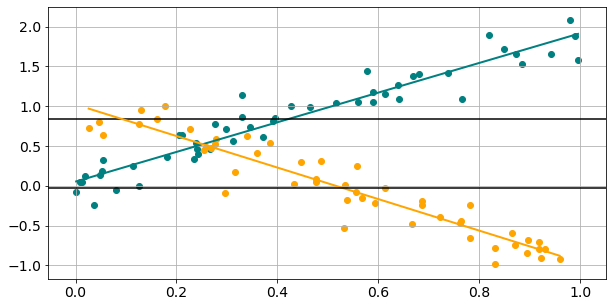

R Q1. a) Mediile pentru ambele grupuri
Group 1 X mean: 0.4246612331653457
Group 2 X mean: 0.5297706140463139

R Q1. b) Diferenta intre medii si intercept-uri.
Group 1 Y mean: 0.8443974189020115
Group 2 Y mean: -0.028140396828442125
Group 1 intercept: 0.052345002636214166
Group 2 intercept: 1.0219687341039043



In [9]:
print(f'R Q1. c) Cazul 5: Daca am presupune ca pantele celor doua drepte de regresie ar fi aceleasi.')

n, sigma = 50, 0.2
beta0, beta1 = 0, 2
x = np.r_[np.random.rand(n), + (np.random.rand(n))]
t = np.array([0]*n + [1]*n)

build_case(x, t, beta0, beta1, -beta1)

__Q2.__ Pentru datele sintetice generate mai jos:

a) realizați scatter plot-ul împreună cu dreapta de regresie Y($x_1$); există corelație între $Y$ și $x_1$?

b) figurați, precum la curs, culoarea punctului în funcție de $x_2$;

c) analizați acum dependența liniară dintre reziduurile lui $Y$ și $x_1$, anume dependența dintre $Y$ și $x_1$ în cazul în care din ambele variabile variabilitatea lui $x_2$ a fost deja eliminată. Ce observați?

R Q2. a) Scatter plot si dreapta de regresie + b) colorarea punctului in functie de x2.


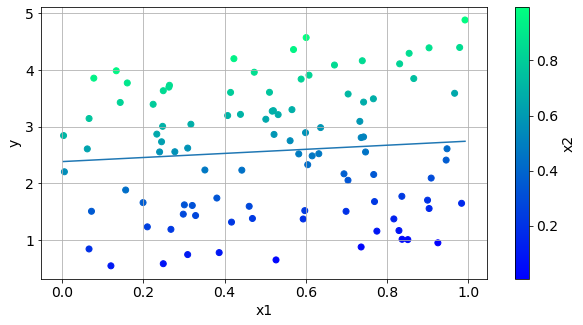

In [10]:
p, n = 1, 100
x2 = np.random.rand(n)
x1 = p * np.random.rand(n) - (1-p) * x2
beta0, beta1, tau, sigma = 0, 1, 4, .01
y = beta0 + x1 * beta1 + tau * x2 + np.random.randn(n)*sigma
df = pd.DataFrame({'x1': x1, 'y': y})
params = smf.ols(formula='y ~ x1', data=df).fit().params

print(f'R Q2. a) Scatter plot si dreapta de regresie + b) colorarea punctului in functie de x2.')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
cm = plt.cm.get_cmap('winter')
sc = ax.scatter(x1, y, c=x2, cmap=cm)
x = np.linspace(min(x1), max(x1), 10)
ax.plot(x, params[0] + x * params[1])
ax.set_xlabel('x1') ; ax.set_ylabel('y')
fig.colorbar(sc, ax=ax).set_label('x2')
ax.grid() ; plt.show()

In [11]:
corr = np.corrcoef(y, x1)[0, 1]

print(f'R Q2. a) Corelatia dintre Y si x1: {corr}')

R Q2. a) Corelatia dintre Y si x1: 0.0887325371019102


In [12]:
print(f'R Q2. c) Dependenta liniara intre Y si x1.')

df['x2'] = x2

lm_x1 = smf.ols(formula='x1 ~ x2', data=df).fit()
print('x1 ~ x2')
print(lm_x1.params)
print()

lm_y = smf.ols(formula='y ~ x2', data=df).fit()
print('y ~ x2')
print(lm_y.params)

R Q2. c) Dependenta liniara intre Y si x1.
x1 ~ x2
Intercept    0.599254
x2          -0.149727
dtype: float64

y ~ x2
Intercept    0.605423
x2           3.842997
dtype: float64


In [13]:
df['residY'] = lm_y.resid
df['residX1'] = lm_x1.resid

print(f'R Q2. c) residY ~ residX1 - 1')
lm = smf.ols(formula='residY ~ residX1 - 1', data=df).fit()
lm.summary()

R Q2. c) residY ~ residX1 - 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 residY   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.956e+04
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                   3.42e-148
Time:                        19:00:25   Log-Likelihood:                          331.38
No. Observations:                 100   AIC:                                     -660.8
Df Residuals:                      99   BIC:                                     -658.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
residX1        0.9908      0.003    299.267      0.000       0.984       0.997
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.146
Skew:                          -0.065   Prob(JB):                        0.930
Kurtosis:                       2.865   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(f'R Q2. c) y ~ x1 + x2')
lm = smf.ols(formula='y ~ x1 + x2', data=df).fit()
lm.summary()

R Q2. c) y ~ x1 + x2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.566e+05
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          4.29e-204
Time:                        19:00:25   Log-Likelihood:                 331.38
No. Observations:                 100   AIC:                            -656.8
Df Residuals:                      97   BIC:                            -648.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0117      0.003      4.246      0.000       0.006       0.017
x1             0.9908      0.003    296.229      0.000       0.984       0.997
x2             3.9914      0.003   1225.262      0.000       3.985       3.998
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.146
Skew:                          -0.065   Prob(JB):                        0.930
Kurtosis:                       2.865   Cond. No.                         6.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
print(f"R Q2. c) residX1 are aceeasi valoare cu coeficientul x1 din 'y ~ x1 + x2'.")
print(f'R Q2. c) x2 nu este relevant.')

R Q2. c) residX1 are aceeasi valoare cu coeficientul x1 din 'y ~ x1 + x2'.
R Q2. c) x2 nu este relevant.


__Q3.__ Pentru setul seatbelts, potriviți un model liniar pentru răspunsul deaths în funcție de predictorii kms și PetrolPrice. Interpretați rezultatele.

In [16]:
seatbelts = pd.read_csv('seatbelts.csv')
seatbelts.head()

,Unnamed: 0,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
0,1,107,1687,867,269,9059,0.102972,12,0
1,2,97,1508,825,265,7685,0.102363,6,0
2,3,102,1507,806,319,9963,0.102062,12,0
3,4,87,1385,814,407,10955,0.100873,8,0
4,5,119,1632,991,454,11823,0.101020,10,0


In [17]:
lm = smf.ols(formula='DriversKilled ~ kms + PetrolPrice',
             data=seatbelts).fit()
print(lm.params)
lm.summary()

Intercept      215.746125
kms             -0.001750
PetrolPrice   -643.789460
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          DriversKilled   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     21.37
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.29e-09
Time:                        19:00:25   Log-Likelihood:                -873.28
No. Observations:                 192   AIC:                             1753.
Df Residuals:                     189   BIC:                             1762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     215.7461     14.666     14.711      0.000     186.817     244.675
kms            -0.0017      0.001     -2.847      0.005      -0.003      -0.001
PetrolPrice  -643.7895    148.290     -4.341      0.000    -936.305    -351.274
==============================================================================
Omnibus:                        6.488   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.155
Skew:                           0.384   Prob(JB):                       0.0461
Kurtosis:                       2.577   Cond. No.                     1.37e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
print(f'R Q3. p-value kms = 0.005')
print(f'R Q3. p-value PetrolPrice = 0.000')
print(f'R Q3. Ambele valori au p-value <= 0.005, deci predictorii kms si PetrolPrice sunt relevanti.')

R Q3. p-value kms = 0.005
R Q3. p-value PetrolPrice = 0.000
R Q3. Ambele valori au p-value <= 0.005, deci predictorii kms si PetrolPrice sunt relevanti.


__Q4.__ Pentru același set seatbelts, comparați coeficientul (panta) pentru kms cu și fără includerea PetrolPrice în model.

In [19]:
lm = smf.ols(formula='DriversKilled ~ kms + PetrolPrice',
             data=seatbelts).fit()

intercept = lm.params[0]
kms = lm.params[1]
pp = lm.params[2]

print(f'R Q4. PetrolPrice inclus in model.')
print(f'Intercept: {intercept}')
print(f'kms: {kms}')
print(f'PetrolPrice: {pp}')

R Q4. PetrolPrice inclus in model.
Intercept: 215.7461249111755
kms: -0.0017495459542165195
PetrolPrice: -643.7894597830386


In [20]:
lm = smf.ols(formula='DriversKilled ~ kms',
             data=seatbelts).fit()

print(f'R Q4. PetrolPrice exclus din model.')
intercept = lm.params[0]
kms = lm.params[1]
print(f'Intercept: {intercept}')
print(f'kms: {kms}')

R Q4. PetrolPrice exclus din model.
Intercept: 164.39114394499842
kms: -0.002773786752629139


__Q5.__ Realizați același lucru pentru PetrolPrice, acum incluzînd (sau nu) kms în model.

In [21]:
lm = smf.ols(formula='DriversKilled ~ PetrolPrice + kms',
             data=seatbelts).fit()

intercept = lm.params[0]
pp = lm.params[1]
kms = lm.params[2]

print(f'R Q5. kms inclus in model.')
print(f'Intercept: {intercept}')
print(f'PetrolPrice: {pp}')
print(f'kms: {kms}')

R Q5. kms inclus in model.
Intercept: 215.746124912454
PetrolPrice: -643.7894597908454
kms: -0.0017495459541697956


In [22]:
lm = smf.ols(formula='DriversKilled ~ PetrolPrice',
             data=seatbelts).fit()

print(f'R Q5. kms exclus din model.')
intercept = lm.params[0]
pp = lm.params[1]
print(f'Intercept: {intercept}')
print(f'PetrolPrice: {pp}')

R Q5. kms exclus din model.
Intercept: 206.30852922085546
PetrolPrice: -805.8600519230354


__Q6.__ Realizați analiza reziduurilor folosind dfbetas și hat values. Căutați minime sau maxime. Extrema este la distanță de un ordin de mărime?

In [23]:
seatbelts.describe()

,Unnamed: 0,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,96.500000,122.802083,1670.307292,837.218750,401.208333,14993.604167,0.103624,9.057292,0.119792
std,55.569776,25.379886,289.610958,175.098967,83.102210,2938.049207,0.012176,3.636903,0.325567
min,1.000000,60.000000,1057.000000,426.000000,224.000000,7685.000000,0.081179,2.000000,0.000000
25%,48.750000,104.750000,1461.750000,715.500000,344.750000,12685.000000,0.092577,6.000000,0.000000
50%,96.500000,118.500000,1631.000000,828.500000,401.500000,14987.000000,0.104477,8.000000,0.000000
75%,144.250000,138.000000,1850.750000,950.750000,456.250000,17202.500000,0.114056,12.000000,0.000000
max,192.000000,198.000000,2654.000000,1299.000000,646.000000,21626.000000,0.133027,17.000000,1.000000


In [24]:
formula = 'DriversKilled ~ drivers + front + rear + kms + PetrolPrice + VanKilled + law'

model = smf.ols(formula=formula, data=seatbelts).fit()

In [25]:
dfbetas = OLSInfluence(model).dfbetas
print(dfbetas.shape)
print()

print(f'R Q6. dfbetas:')
print(dfbetas[:,7])

(192, 8)

R Q6. dfbetas:
[-1.25294838e-01 -4.50909875e-02 -7.87415965e-03  5.24261789e-02
  4.57472778e-03 -6.19451021e-03  3.10679351e-03 -3.07989930e-02
 -3.22754566e-02 -9.72157757e-02 -8.81294504e-02  1.64787507e-01
 -2.12167517e-03  4.56127933e-02 -1.64234308e-01 -3.42594323e-02
  7.45678016e-03 -5.60322369e-03 -7.29106140e-03  9.95375729e-04
 -1.41225785e-02  3.34893602e-01  2.13728682e-02  6.64628427e-02
 -6.83549993e-02 -1.24895134e-01 -5.91679918e-03  1.72903052e-04
  4.32076506e-02  5.18383175e-02 -9.46430944e-03  1.61362077e-02
  4.42197088e-02 -4.92417316e-02  1.01150912e-01 -9.96342311e-02
  4.12577352e-02 -2.30240219e-02 -1.11821348e-01 -2.30216470e-02
  9.91569053e-02  1.39361387e-01 -4.32936770e-02 -1.62891758e-02
 -5.84870731e-03  9.43445018e-02 -1.77134792e-02 -1.41683196e-02
  7.11970920e-03  6.31024407e-04 -3.94616173e-02 -7.74989075e-02
 -3.06863515e-03 -6.22606343e-03 -3.69202184e-03  2.57029781e-02
 -1.03320669e-02 -1.82843487e-02  4.59948672e-02  2.24657516e-02


In [26]:
hatvalues = OLSInfluence(model).summary_frame().hat_diag.values
print(hatvalues.shape)
print()

print(f'R Q6. Hat values:')
print(hatvalues[:])

(192,)

R Q6. Hat values:
[0.0528204  0.08707999 0.03502931 0.06227887 0.03465648 0.038815
 0.04662423 0.06599903 0.03533055 0.05902897 0.04273503 0.04612283
 0.04704007 0.0591716  0.06687643 0.03143241 0.04547969 0.02987884
 0.03488592 0.07240714 0.02526935 0.0384972  0.04791329 0.09125397
 0.03904445 0.07276613 0.02763015 0.02678243 0.01687221 0.02589202
 0.03154507 0.08418517 0.02495042 0.02264386 0.0327776  0.03346009
 0.03245718 0.06486401 0.02840514 0.03078775 0.03071045 0.04003181
 0.04739593 0.05268585 0.0159803  0.04344253 0.05987118 0.07737407
 0.03830056 0.05118418 0.04070978 0.05300341 0.02911501 0.02764882
 0.0679124  0.08112273 0.04117549 0.03299378 0.05957153 0.03474622
 0.02893718 0.05368451 0.01779282 0.0473999  0.01814934 0.02335184
 0.04566819 0.04927867 0.05929575 0.03616209 0.07023389 0.0455803
 0.07014206 0.10050004 0.05917765 0.04336236 0.03323558 0.02188059
 0.01961875 0.03895258 0.02355802 0.02354687 0.02742737 0.05329865
 0.04370702 0.03618513 0.02315834 0.048

Distributia dfbetas:


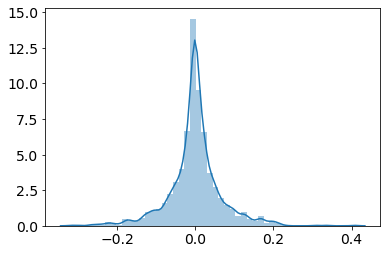

In [27]:
print('Distributia dfbetas:')

sns.distplot(dfbetas)

Distributia hatvalues:


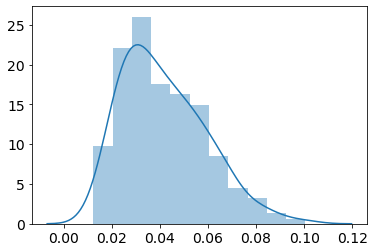

In [28]:
print('Distributia hatvalues:')

sns.distplot(hatvalues)

In [29]:
print(f'R Q6. Valori minime si maxime.')

print('Valoare minima dfbeta:', np.min(dfbetas))
print('Valoare maxima dfbeta:', np.max(dfbetas))

print('Valoare minima hat value:', np.min(hatvalues))
print('Valoare maxima hat value:', np.max(hatvalues))

print('Extremele nu sunt izolate si deci nu influenteaza regresia.')

R Q6. Valori minime si maxime.
Valoare minima dfbeta: -0.3174445966653808
Valoare maxima dfbeta: 0.40740399689524803
Valoare minima hat value: 0.01235828911861318
Valoare maxima hat value: 0.10050004408530497
Extremele nu sunt izolate si deci nu influenteaza regresia.


__Q7.__ Ridicați diagramele Residuals vs. Fitted, Q-Q plot, Scale-Location, Residuals vs. Leverage (aceasta din urmă ridicați-o folosind Studentized Residuals vs. H Leverage). Încercați să explicați ce observați.

In [30]:
formula = 'DriversKilled ~ drivers + front + rear + kms + PetrolPrice + VanKilled + law'

model = smf.ols(formula=formula, data=seatbelts).fit()

R Q7. Diagrama Residuals vs Fitted.


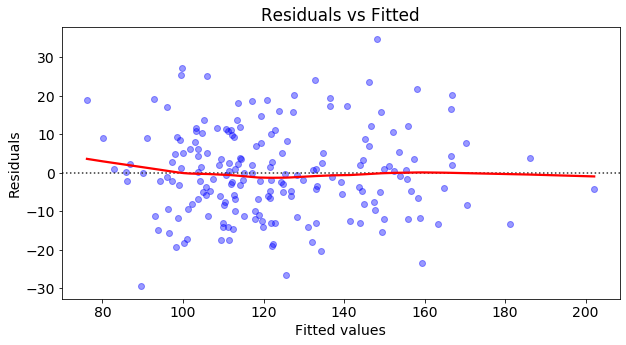

R Q7. Punctele sunt imprastiate uniform, linia este in general dreapta.


In [31]:
print(f'R Q7. Diagrama Residuals vs Fitted.')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.residplot(model.fittedvalues, 'DriversKilled', data=seatbelts, lowess=True, 
                   scatter_kws={'alpha': 0.4, 'color':'blue'},
                   line_kws={'color':'red'})
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
plt.show()

print(f'R Q7. Punctele sunt imprastiate uniform, linia este in general dreapta.')

R Q7. Q-Q plot.


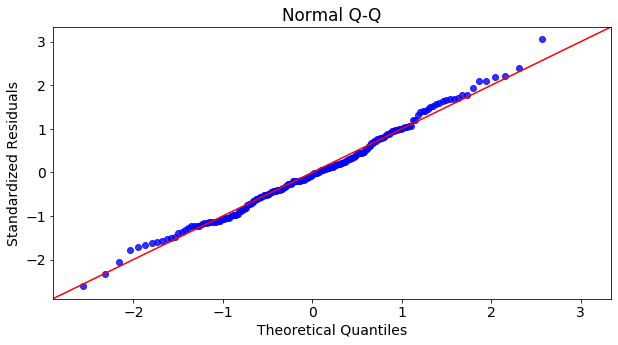

R Q7. Distributia este normala, punctele sunt apropiate de dreapta.


In [32]:
print(f'R Q7. Q-Q plot.')

m_norm_resid = model.get_influence().resid_studentized_internal

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
qq = smgf.ProbPlot(m_norm_resid)
qq.qqplot(line='45', alpha=0.8, lw=1, ax=ax)
ax.set_title('Normal Q-Q')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Standardized Residuals')
plt.show()

print(f'R Q7. Distributia este normala, punctele sunt apropiate de dreapta.')

R Q7. Scale-Location.


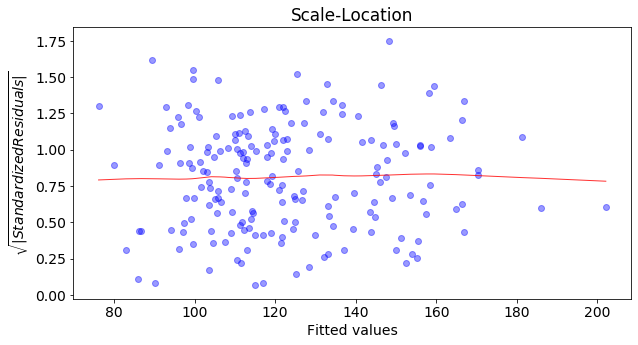

R Q7. Distributia reziduurilor este egala, linia rosie nu se inclina, punctele par aruncate random.


In [33]:
print(f'R Q7. Scale-Location.')

m_fitted_y = model.fittedvalues
m_norm_resid_sqrt = np.sqrt(np.abs(m_norm_resid))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.regplot(m_fitted_y, m_norm_resid_sqrt, scatter=True, lowess=True,
                 scatter_kws={'alpha': 0.4, 'color':'blue'},
                 line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Standardized Residuals|}$')
plt.show()

print(f'R Q7. Distributia reziduurilor este egala, linia rosie nu se inclina, punctele par aruncate random.')

R Q7. Residuals vs Leverage Studentized Residuals vs. H Leverage.


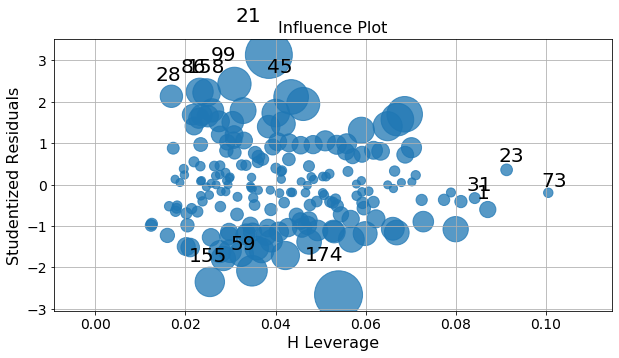

R Q7. Exista puncte indepartate de 0, dar valoarea lor Leverage este mica.


In [34]:
print(f'R Q7. Residuals vs Leverage Studentized Residuals vs. H Leverage.')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sm.graphics.influence_plot(model, criterion='cooks', ax=ax)
plt.grid()
plt.show()

print(f'R Q7. Exista puncte indepartate de 0, dar valoarea lor Leverage este mica.')

R Q7. Residuals vs Leverage Standardized Residuals vs. Leverage.


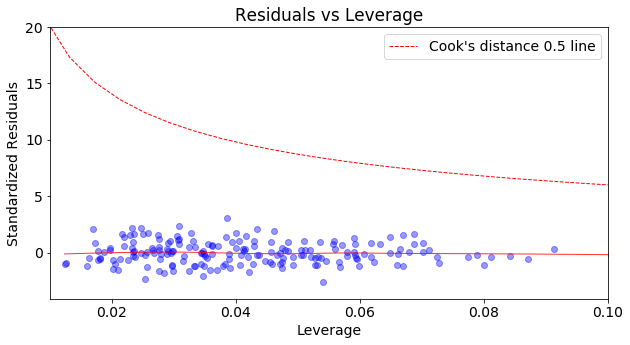

R Q7. Nu exista puncte in afara distantei Cook.


In [35]:
print(f'R Q7. Residuals vs Leverage Standardized Residuals vs. Leverage.')

m_leverage = model.get_influence().hat_matrix_diag
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.regplot(m_leverage, m_norm_resid, scatter=True, lowess=True,
                 scatter_kws={'alpha': 0.4, 'color':'blue'},
                 line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')
ax.set_xlim(0.01, 0.1)
ax.set_ylim(-4.1, 20)

def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    ax.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.2, 50), 'Cook\'s distance 0.5 line') # 0.5 line
ax.legend(loc='upper right');
plt.show()

print(f'R Q7. Nu exista puncte in afara distantei Cook.')